In [38]:
import scipy as sc
from scipy import stats, optimize, interpolate
import numpy
import functions
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import time
from tensorflow.keras.optimizers import Adam, SGD

matplotlib.rcParams.update({'font.size': 22})
tf.get_logger().setLevel('INFO')

In [39]:
guess = numpy.zeros((1,11))

## Descenso del gradiente conjugado

In [40]:
def CDG(max):
    result = sc.optimize.minimize(functions.error,guess, method = 'CG', options={'maxiter':max})
    planar = result.x
    W,w,wo =functions.convert(planar)
    return result.fun,W,w,wo
 

## Descenso del gradiente

In [41]:
def DG(max):
    opt = SGD(learning_rate=1)
    sgd_guess = [tf.Variable(0.0) for i in range(11)]
    loss = lambda : functions.error(sgd_guess)
    iter = 0
    while(iter < max):
        opt.minimize(loss,sgd_guess)
        iter+=1

    W,w,wo =functions.convert([v.numpy() for v in sgd_guess])
    return loss().numpy(),W,w,wo

## Adam

In [42]:
def ADAM(max):
    opt = Adam(learning_rate=1)
    adam_guess = [tf.Variable(0.0) for i in range(11)]
    loss = lambda : functions.error(adam_guess)
    iter = 0
    while(iter < max):
        opt.minimize(loss,adam_guess)
        iter+=1

    W,w,wo =functions.convert([v.numpy() for v in adam_guess])
    return loss().numpy(),W,w,wo

## Resultados

In [43]:
methods = [CDG,DG,ADAM]
max_iter = 20
for method in methods:
    print(method.__name__)
    start = time.process_time()
    error,W,w,wo = method(max_iter)
    end = time.process_time()
    print("time: ",end-start)
    print("Error: ",error)
    print("W: ",W)
    print("w: ")
    for row in w:
        print(row)
    print("w0 :",wo)
    print()

CDG
time:  0.03396606100000099
Error:  4.693377633449785e-06
W:  [6.15316712 7.1193765  7.1193765 ]
w: 
[-2.76147322  0.53919878  2.34582673]
[-2.76147322  0.53919878  2.34582673]
w0 : [0.06293751 0.06293751]

DG
time:  0.4546507539999993
Error:  0.08051824
W:  [1.1678742, 1.667193, 1.667193]
w: 
[-0.6895213, 0.013628404, 0.5497087]
[-0.6895213, 0.013628404, 0.5497087]
w0 : [-0.008012942, -0.008012942]

ADAM
time:  0.48183778000000643
Error:  5.4507713e-05
W:  [6.077131, 5.6890965, 5.6890965]
w: 
[-5.3453593, 3.615021, 5.0510035]
[-5.3453593, 3.615021, 5.0510035]
w0 : [3.707535, 3.707535]



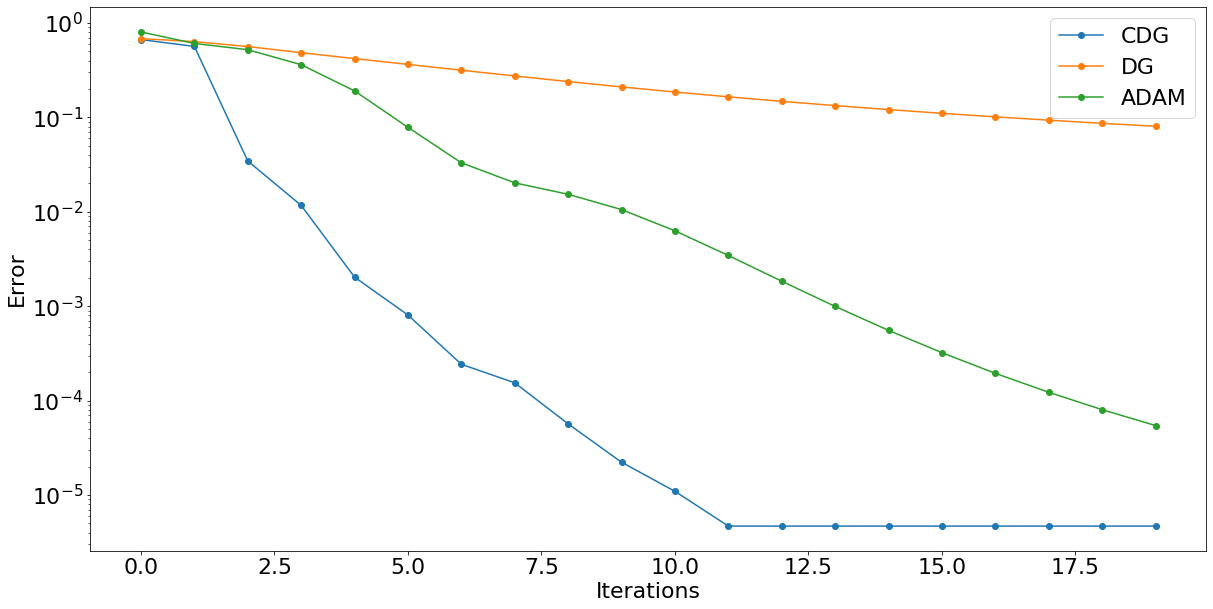

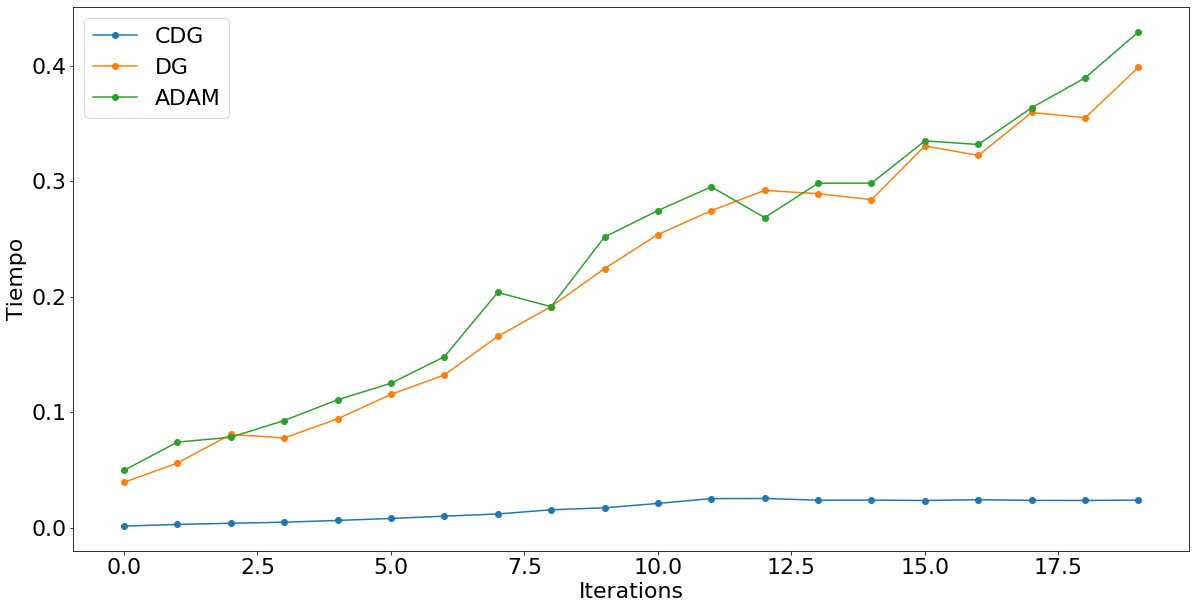

<Figure size 1440x720 with 0 Axes>

In [44]:
max_iter = 20

plt.figure("Error vs Iterations", figsize=(20,10)) 
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.figure("Tiempo vs Iterations", figsize=(20,10)) 
plt.xlabel("Iterations")
plt.ylabel("Tiempo")

errors = [[],[],[]]
times = [[],[],[]]
for i in range(max_iter):
    for j,method in enumerate(methods):
        start = time.process_time()
        error,W,w,wo = method(i+1)
        end = time.process_time()
        errors[j].append(error)
        times[j].append(end-start)

for j,method in enumerate(methods):
    plt.figure("Error vs Iterations", figsize=(20,10)) 
    plt.plot(errors[j],"o-",label=method.__name__)
    plt.figure("Tiempo vs Iterations", figsize=(20,10)) 
    plt.plot(times[j],"o-",label=method.__name__)

plt.figure("Error vs Iterations", figsize=(20,10)) 
plt.legend()
plt.figure("Tiempo vs Iterations", figsize=(20,10)) 
plt.legend()

plt.figure("Error vs Iterations", figsize=(20,10)) 
plt.show()
plt.figure("Tiempo vs Iterations", figsize=(20,10)) 
plt.show()